## Skorch regression network examples

##### MLPClassifier vs. MLPRegressor 

[Chapter 6](https://www.cs.cmu.edu/afs/cs.cmu.edu/user/mitchell/ftp/mlbook.html) gives a Bayesian justification for using log loss when searching for a maximum likelihood hypothesis to predict probabilities and likewise, squared error for regression.  These loss functions are automatically selected when using scikit learn's MLPClassifier or MLPRegressor and cannot be changed. With PyTorch, we can select an appropriate loss function manually or use the skorch regression default - torch.nn.MSELoss.  Additionally, raw outputs are needed for regression so we'll use a linear activation instead of softmax for the output layer. 

In [ ]:
"""
Parts taken from - 
https://skorch.readthedocs.io/en/stable/user/tutorials.html
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html 
""" 

In [1]:
!pip install pyperch

In [4]:
import numpy as np
from sklearn.datasets import make_regression
import torch
from torch import nn, optim
#from skorch import NeuralNetClassifier
from skorch import NeuralNetRegressor
from pyperch.neural.backprop_nn import BackpropModule 
import matplotlib.pyplot as plt

In [7]:
"""
To set a random seed for reproducibility, see -
https://skorch.readthedocs.io/en/stable/user/FAQ.html#how-can-i-set-the-random-seed-of-my-model

Note: algorithms and data are random.  Consider averaging results with different seeds.  
"""
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
X, y = make_regression(n_samples=1000, n_features=12, n_informative=10, noise=.2, random_state=seed)
X = X.astype(np.float32)
y = y.reshape(-1, 1).astype(np.float32)  # Reshape y to be a 2D array for compatibility with nn

# Backprop Regression Example

In [12]:
from skorch.callbacks import EpochScoring 

net = NeuralNetRegressor(
    module=BackpropModule,
    module__layer_sizes=(12, 32, 1),
    #module__dropout_percent=0.1,
    criterion=nn.MSELoss(),
    module__activation=nn.LeakyReLU(),
    module__output_activation=lambda x: x,
    max_epochs=100,
    verbose=0,
    callbacks=[EpochScoring(scoring='r2', name='train_r2', on_train=True), 
               EpochScoring(scoring='r2', name='validation_r2', on_train=False)],
    lr=.0001,
    iterator_train__shuffle=True,
)

In [13]:
# fit data
net.fit(X, y)

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=BackpropModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): LeakyReLU(negative_slope=0.01)
    (layers): ModuleList(
      (0): Linear(in_features=12, out_features=32, bias=True)
      (1): Linear(in_features=32, out_features=1, bias=True)
    )
  ),
)

## Plot learning curves

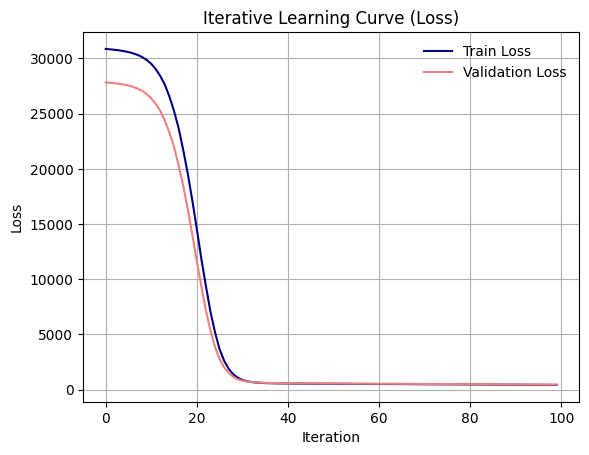

In [14]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

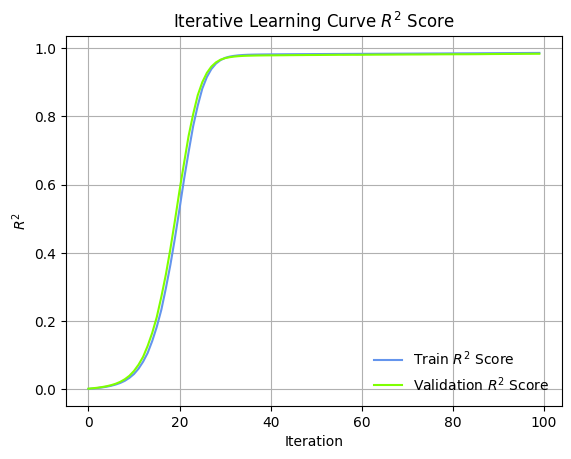

In [15]:
# plot the iterative learning curve (R^2 Score)
plt.plot(net.history[:, 'train_r2'], label='Train $R^2$ Score', color='cornflowerblue')
plt.plot(net.history[:, 'validation_r2'], label='Validation $R^2$ Score', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("$R^2$")
plt.title(r"Iterative Learning Curve $R^2$ Score")
plt.grid(visible=True)
plt.legend(frameon=False)

# RHC Regression Example

In [20]:
from skorch.callbacks import EpochScoring 
from pyperch.neural.rhc_nn import RHCModule  

net = NeuralNetRegressor(
    module=RHCModule,
    module__layer_sizes=(12, 32, 1),
    module__step_size=.05,
    max_epochs=5000,
    verbose=0,
    #module__activation=nn.LeakyReLU(),
    module__output_activation=lambda x: x,
    criterion=nn.MSELoss(),
    callbacks=[EpochScoring(scoring='r2', name='train_r2', on_train=True), 
           EpochScoring(scoring='r2', name='validation_r2', on_train=False)],
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

In [21]:
# fit data
net.fit(X, y)

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=RHCModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (layers): ModuleList(
      (0): Linear(in_features=12, out_features=32, bias=True)
      (1): Linear(in_features=32, out_features=1, bias=True)
    )
  ),
)

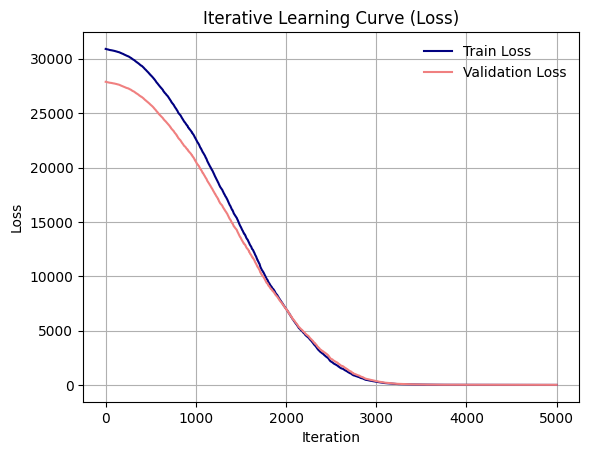

In [22]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

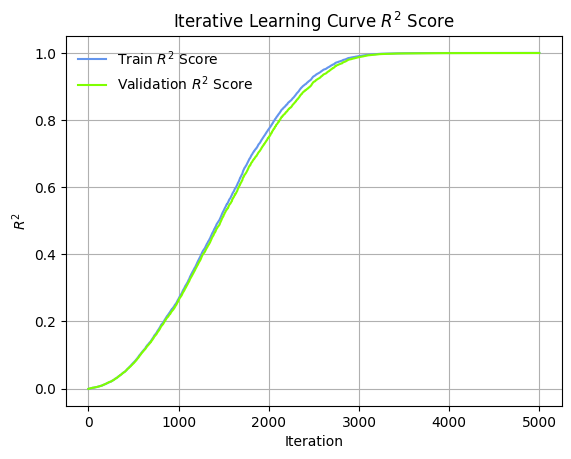

In [23]:
# plot the iterative learning curve (R^2 Score)
plt.plot(net.history[:, 'train_r2'], label='Train $R^2$ Score', color='cornflowerblue')
plt.plot(net.history[:, 'validation_r2'], label='Validation $R^2$ Score', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("$R^2$")
plt.title(r"Iterative Learning Curve $R^2$ Score")
plt.grid(visible=True)
plt.legend(frameon=False)

# SA Regression Example

In [24]:
from skorch.callbacks import EpochScoring 
from pyperch.neural.sa_nn import SAModule  

net = NeuralNetRegressor(
    module=SAModule,
    module__layer_sizes=(12, 32, 1),
    module__step_size=.05,
    max_epochs=5000,
    verbose=0,
    #module__activation=nn.LeakyReLU(),
    criterion=nn.MSELoss(),
    module__output_activation=lambda x: x,
    callbacks=[EpochScoring(scoring='r2', name='train_r2', on_train=True), 
               EpochScoring(scoring='r2', name='validation_r2', on_train=False)],
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

In [25]:
# fit data
net.fit(X, y)

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=SAModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (layers): ModuleList(
      (0): Linear(in_features=12, out_features=32, bias=True)
      (1): Linear(in_features=32, out_features=1, bias=True)
    )
  ),
)

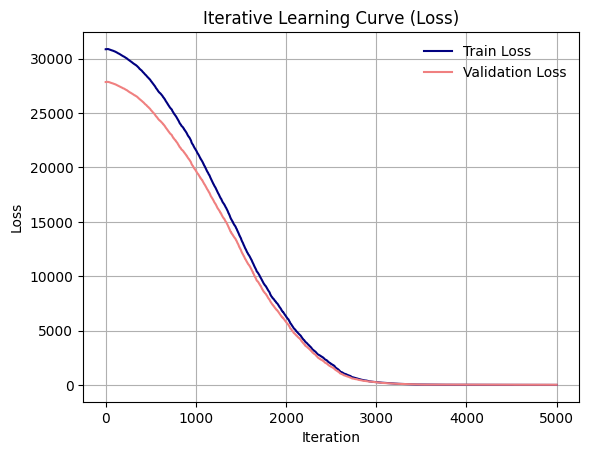

In [26]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

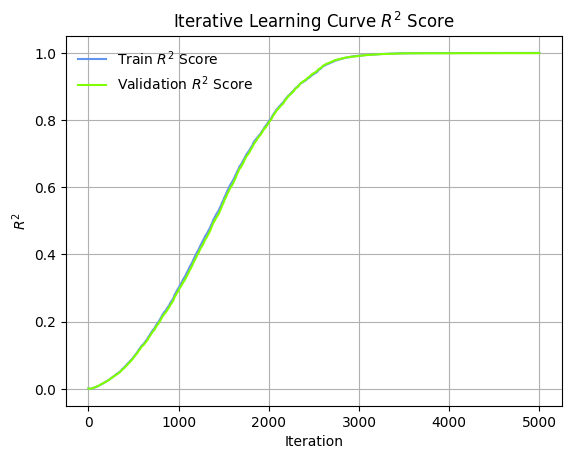

In [27]:
# plot the iterative learning curve (R^2 Score)
plt.plot(net.history[:, 'train_r2'], label='Train $R^2$ Score', color='cornflowerblue')
plt.plot(net.history[:, 'validation_r2'], label='Validation $R^2$ Score', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("$R^2$")
plt.title(r"Iterative Learning Curve $R^2$ Score")
plt.grid(visible=True)
plt.legend(frameon=False)

# GA Regression Example

In [38]:
from skorch.callbacks import EpochScoring 
from pyperch.neural.ga_nn import GAModule  

net = NeuralNetRegressor(
    module=GAModule,
    module__layer_sizes=(12, 32, 1),
    module__population_size=300,
    module__to_mate=30,
    module__to_mutate=10,
    max_epochs=250,
    verbose=0,
    criterion=nn.MSELoss(), 
    module__output_activation=lambda x: x,
    callbacks=[EpochScoring(scoring='r2', name='train_r2', on_train=True), 
               EpochScoring(scoring='r2', name='validation_r2', on_train=False)],
)

In [39]:
# fit data
net.fit(X, y)

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=GAModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (layers): ModuleList(
      (0): Linear(in_features=12, out_features=32, bias=True)
      (1): Linear(in_features=32, out_features=1, bias=True)
    )
  ),
)

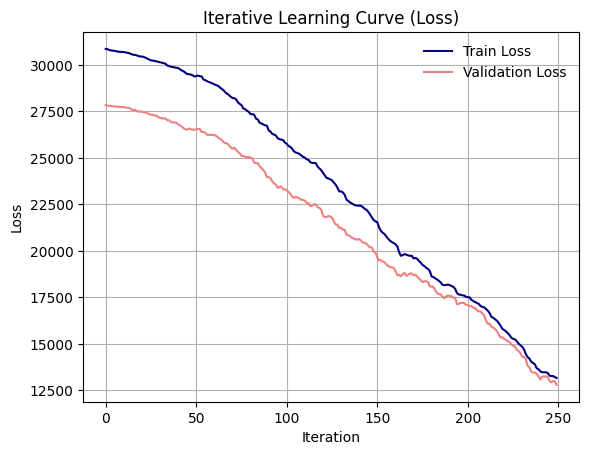

In [40]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

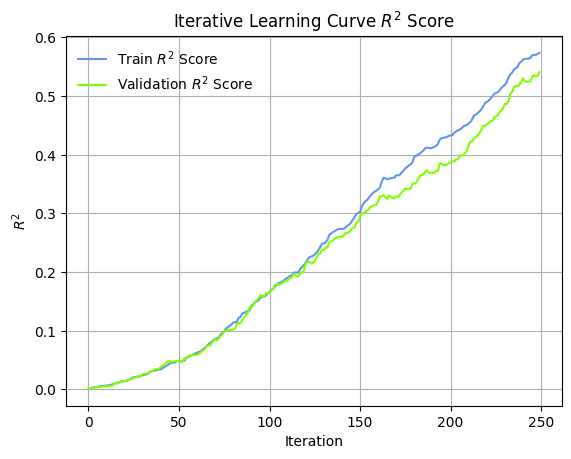

In [41]:
# plot the iterative learning curve (R^2 Score)
plt.plot(net.history[:, 'train_r2'], label='Train $R^2$ Score', color='cornflowerblue')
plt.plot(net.history[:, 'validation_r2'], label='Validation $R^2$ Score', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("$R^2$")
plt.title(r"Iterative Learning Curve $R^2$ Score")
plt.grid(visible=True)
plt.legend(frameon=False)